In [79]:
%matplotlib inline
import sys
sys.path.append("../")

from law import read_experiments, parse_results, fit, optimize
import numpy as np
from mixture_optimization.datamodels.trial_tracking_config import Experiment, ValResult, Dict, Trial, TrialType
from typing import List
import random
import matplotlib.pyplot as plt

In [80]:
path = "/root/code/mixture_optimization/logs/bayesian_books_cc_stack_pes2o_0/experiment_history.yaml"
experiments = read_experiments(path)
experiment = experiments[0]

In [81]:
start_idx = 8
trial0 = experiment.trials[start_idx]
result_collection = [[] for _ in trial0.all_results]
labels = [f"{list(res.values())[0].train_tokens_seen // 1_000_000}M" for res in trial0.all_results]
lines = []

for trial in experiment.trials[start_idx:]:
    if trial.weighted_val_perplexity is None:
        continue
    for i, result in enumerate(trial.all_results):
        result_list = [val.perplexity for val in result.values()]
        avg = np.mean(result_list)
        result_collection[i].append(avg)

In [82]:
def convert_list_into_size_idx(results: List[float]) -> List[int]:
    """For each element in list return position it would have in ordered list"""
    sorted_results = sorted(results)
    return [sorted_results.index(x) for x in results]

def reorder_list_to_idx(elements, idx):
    out_list = [None] * len(elements)
    for val, idx in zip(elements, idx):
        out_list[idx] = val
    return out_list


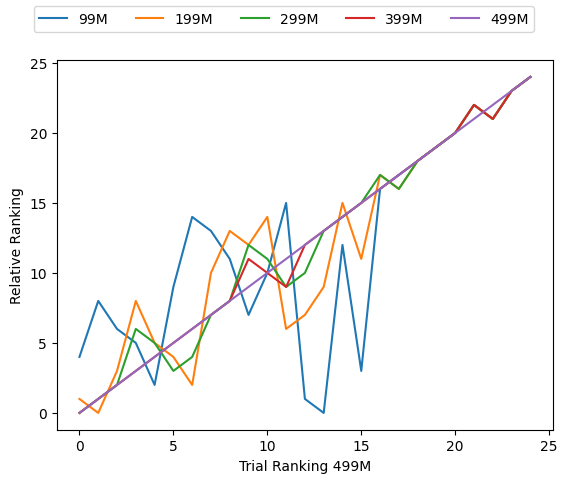

In [84]:
last_results = result_collection[-1]
last_results_idx = convert_list_into_size_idx(last_results)
last_results = reorder_list_to_idx(last_results, last_results_idx)

all_results_reordered = [reorder_list_to_idx(results, last_results_idx) for results in result_collection]
all_results_reordered_size_idx = [convert_list_into_size_idx(results) for results in all_results_reordered]


fig, ax = plt.subplots()
for res in all_results_reordered_size_idx:
    x = np.arange(len(res))
    line, = ax.plot(x, res)
    lines.append(line)

# add axis description
ax.set_xlabel(f'Trial Ranking {labels[-1]}')
ax.set_ylabel('Relative Ranking')

fig.legend(lines, labels, loc='upper center', ncol=len(labels))
